# Neural Network (MLP Classifier)

In [1]:
# Restart then execute
#!pip3 uninstall tensorflow -y
#!pip3 uninstall numpy -y
!pip3 install numpy==1.24.3
!pip3 install tensorflow[and-cuda]==2.17.0

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import classification_report
import tensorflow as tf

print("NumPy version:", np.__version__)
print("TF version:", tf.__version__)

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


2024-11-27 22:21:25.487228: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-27 22:21:26.274618: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-27 22:21:26.556393: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-27 22:21:26.631871: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-27 22:21:27.209700: I tensorflow/core/platform/cpu_feature_guar

NumPy version: 1.24.3
TF version: 2.17.0


In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPUs available: {[gpu.name for gpu in gpus]}")
else:
    print("No GPU available.")
!lspci | grep -i nvidia
!nvidia-smi
!ldconfig -p | grep libcudnn

print(tf.__version__)
# Check the CUDA version TensorFlow was built against
cuda_version = tf.sysconfig.get_build_info()["cuda_version"]
print(f"CUDA version TensorFlow is built for: {cuda_version}")

# Check the cuDNN version TensorFlow was built against
cudnn_version = tf.sysconfig.get_build_info()["cudnn_version"]
print(f"cuDNN version TensorFlow is built for: {cudnn_version}")
print(tf.sysconfig.get_build_info())


GPUs available: ['/physical_device:GPU:0']
3b:00.0 3D controller: NVIDIA Corporation GV100GL [Tesla V100 PCIe 16GB] (rev a1)
af:00.0 3D controller: NVIDIA Corporation GV100GL [Tesla V100 PCIe 16GB] (rev a1)
Wed Nov 27 22:21:37 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.02              Driver Version: 555.42.02      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla V100-PCIE-16GB           On  |   00000000:3B:00.0 Off |                    0 |
| N/A   37C    P0        

In [3]:
X_train = pd.read_csv('./preprocessed/X_train_res.csv')
y_train = pd.read_csv('./preprocessed/y_train_res.csv').values.ravel()
X_test = pd.read_csv('./preprocessed/X_test.csv')
y_test = pd.read_csv('./preprocessed/y_test.csv').values.ravel()

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

print("Classes and their encoded values:")
for index, label in enumerate(label_encoder.classes_):
    print(f"{label}: {index}")

Classes and their encoded values:
0: 0
1: 1


In [4]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping
import joblib

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3,  # Stop after 3 epochs without improvement
    restore_best_weights=True
)
    
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification (delayed or not)
])

2024-11-27 14:13:30.029704: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43526 MB memory:  -> device: 0, name: NVIDIA L40S, pci bus id: 0000:1b:00.0, compute capability: 8.9


In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])

In [7]:
model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, callbacks=[early_stopping]) #, validation_data=(X_test_scaled, y_test)

Epoch 1/5


I0000 00:00:1732721259.517285 1227601 service.cc:146] XLA service 0x1551d4017630 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732721259.517317 1227601 service.cc:154]   StreamExecutor device (0): NVIDIA L40S, Compute Capability 8.9
2024-11-27 10:27:39.550165: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-27 10:27:39.707190: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


    118/1096170 ━━━━━━━━━━━━━━━━━━━━ 23:44 1ms/step - Precision: 0.6999 - Recall: 0.7606 - accuracy: 0.6985 - loss: 0.5588

I0000 00:00:1732721260.854917 1227601 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1096170/1096170 ━━━━━━━━━━━━━━━━━━━━ 1380s 1ms/step - Precision: 0.9837 - Recall: 0.9863 - accuracy: 0.9858 - loss: 0.0387
Epoch 2/5


/home/hice1/abahar6/.local/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: Precision,Recall,accuracy,loss
  current = self.get_monitor_value(logs)


1096170/1096170 ━━━━━━━━━━━━━━━━━━━━ 1362s 1ms/step - Precision: 0.9915 - Recall: 0.9960 - accuracy: 0.9944 - loss: 0.0160
Epoch 3/5
1096170/1096170 ━━━━━━━━━━━━━━━━━━━━ 1351s 1ms/step - Precision: 0.9931 - Recall: 0.9967 - accuracy: 0.9955 - loss: 0.0132
Epoch 4/5
1096170/1096170 ━━━━━━━━━━━━━━━━━━━━ 1346s 1ms/step - Precision: 0.9939 - Recall: 0.9972 - accuracy: 0.9961 - loss: 0.0116
Epoch 5/5
1096170/1096170 ━━━━━━━━━━━━━━━━━━━━ 1344s 1ms/step - Precision: 0.9947 - Recall: 0.9975 - accuracy: 0.9966 - loss: 0.0103


In [18]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(32)

metrics = model.evaluate(test_dataset)
print('Test accuracy:', metrics)

predictions = model.predict(X_test_scaled)
      
model.save('NN_all_features.h5') 

1282580/1282580 ━━━━━━━━━━━━━━━━━━━━ 1457s 1ms/step - Precision: 0.9854 - Recall: 0.9981 - accuracy: 0.9975 - loss: 0.0078
Test accuracy: [0.00792520958930254, 0.9985365271568298, 0.9853955507278442, 0.9980626702308655]
1282580/1282580 ━━━━━━━━━━━━━━━━━━━━ 822s 640us/step


In [21]:
predictions = (predictions >= 0.5).astype(int)
print(predictions)
model.save('NN_all_features.keras') 

[[3.4347700e-05]
 [2.8648399e-05]
 [2.2584780e-05]
 ...
 [1.0000000e+00]
 [2.2674818e-05]
 [2.6188271e-05]]


## Chi-Squared FS

Feature (0) YEAR: 39109.483068
Feature (1) QUARTER: 2590.567289
Feature (2) MONTH: 3030.409596
Feature (3) DAY_OF_MONTH: 17084.767803
Feature (4) DAY_OF_WEEK: 2865.981582
Feature (5) OP_CARRIER_AIRLINE_ID: 99.571519
Feature (6) ORIGIN_AIRPORT_SEQ_ID: 1598843.984088
Feature (7) ORIGIN_CITY_MARKET_ID: 2833592.127641
Feature (8) DEST_AIRPORT_SEQ_ID: 565711.796257
Feature (9) DEST_CITY_MARKET_ID: 209385.954874
Feature (10) CRS_DEP_TIME: 169480273.448274
Feature (11) DEP_TIME: 287835731.789073
Feature (12) CANCELLED: 9617.146234
Feature (13) CARRIER_DELAY: 7125916.761822
Feature (14) WEATHER_DELAY: 966734.458429
Feature (15) NAS_DELAY: 32946.059007
Feature (16) SECURITY_DELAY: 55189.927454
Feature (17) LATE_AIRCRAFT_DELAY: 8003892.121785


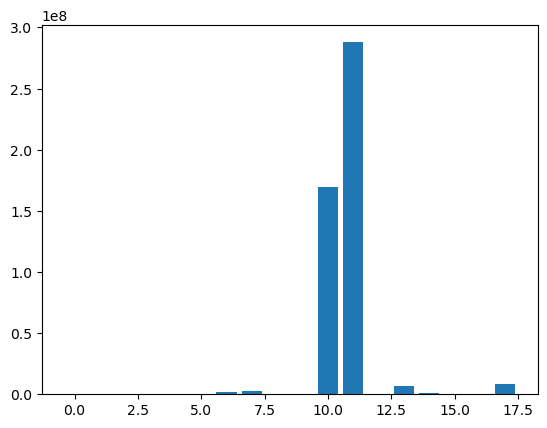

In [11]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

fs_chi2 = SelectKBest(score_func=chi2, k=9)
fs_chi2.fit(X_train, y_train)
X_train_chi2 = fs_chi2.transform(X_train)
X_test_chi2 = fs_chi2.transform(X_test)

for i in range(len(fs_chi2.scores_)):
	print('Feature (%d) %s: %f' % (i, fs_chi2.feature_names_in_[i], fs_chi2.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs_chi2.scores_))], fs_chi2.scores_)
plt.show()

In [12]:
fs_chi2.get_feature_names_out()

array(['ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'CRS_DEP_TIME',
       'DEP_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'LATE_AIRCRAFT_DELAY'], dtype=object)

## Mutual FS

In [5]:
print(type(X_train), type(y_train))
y_train_df = pd.DataFrame(y_train, columns=['DEP_DEL15'])
df_mifs = pd.concat([X_train, y_train_df], axis = 1)
rand_samp = df_mifs.sample(n=10**6, axis = 0)
rand_samp

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_DEL15
34120108,10.0,2.0,7.0,7.0,3.0,15.0,345.0,115.0,241.0,95.0,1319.0,55.0,0.0,0.0,0.0,22.0,0.0,0.0,1
9991880,17.0,0.0,1.0,6.0,4.0,25.0,857.0,297.0,844.0,292.0,930.0,923.0,0.0,0.0,0.0,21.0,0.0,0.0,0
16128389,20.0,3.0,10.0,3.0,5.0,22.0,617.0,189.0,149.0,66.0,1438.0,1.0,0.0,0.0,0.0,21.0,0.0,0.0,0
7453247,0.0,0.0,0.0,14.0,2.0,12.0,700.0,126.0,705.0,85.0,1202.0,1199.0,0.0,0.0,0.0,21.0,0.0,0.0,0
12897042,4.0,3.0,9.0,17.0,3.0,7.0,651.0,150.0,726.0,210.0,514.0,520.0,0.0,0.0,0.0,21.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27139899,20.0,3.0,9.0,5.0,4.0,25.0,514.0,125.0,701.0,126.0,950.0,975.0,0.0,0.0,0.0,21.0,0.0,0.0,1
32073994,5.0,1.0,5.0,5.0,4.0,11.0,144.0,64.0,314.0,29.0,1116.0,1361.0,0.0,0.0,0.0,21.0,0.0,1.0,1
27140954,1.0,3.0,11.0,18.0,6.0,11.0,1035.0,329.0,941.0,324.0,1244.0,1370.0,0.0,0.0,0.0,22.0,0.0,0.0,1
10988330,17.0,1.0,5.0,6.0,6.0,6.0,80.0,34.0,871.0,18.0,1203.0,1198.0,0.0,0.0,0.0,21.0,0.0,0.0,0


In [6]:
X_train_mifs = rand_samp.drop(columns=['DEP_DEL15'])
y_train_mifs = rand_samp['DEP_DEL15']

Feature (0) YEAR: 0.009064
Feature (1) QUARTER: 0.026370
Feature (2) MONTH: 0.013578
Feature (3) DAY_OF_MONTH: 0.003593
Feature (4) DAY_OF_WEEK: 0.020073
Feature (5) OP_CARRIER_AIRLINE_ID: 0.011637
Feature (6) ORIGIN_AIRPORT_SEQ_ID: 0.008180
Feature (7) ORIGIN_CITY_MARKET_ID: 0.007250
Feature (8) DEST_AIRPORT_SEQ_ID: 0.005742
Feature (9) DEST_CITY_MARKET_ID: 0.006854
Feature (10) CRS_DEP_TIME: 0.030259
Feature (11) DEP_TIME: 0.061476
Feature (12) CANCELLED: 0.000000
Feature (13) CARRIER_DELAY: 0.190732
Feature (14) WEATHER_DELAY: 0.018278
Feature (15) NAS_DELAY: 0.141936
Feature (16) SECURITY_DELAY: 0.000964
Feature (17) LATE_AIRCRAFT_DELAY: 0.223861


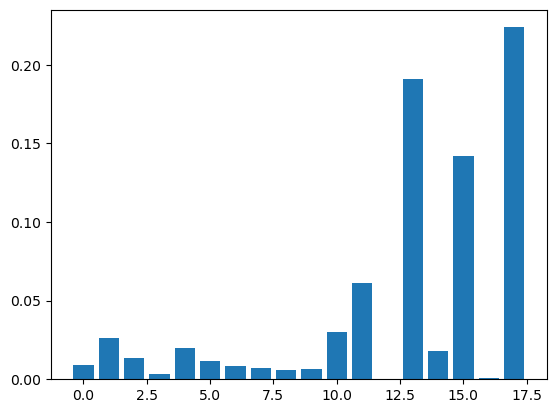

In [7]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt

fs_mutual_info_classif = SelectKBest(score_func=mutual_info_classif, k=9)
fs_mutual_info_classif.fit(X_train_mifs, y_train_mifs)
fs_mutual_info_classif.transform(X_train_mifs)

for i in range(len(fs_mutual_info_classif.scores_)):
	print('Feature (%d) %s: %f' % (i, fs_mutual_info_classif.feature_names_in_[i], fs_mutual_info_classif.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs_mutual_info_classif.scores_))], fs_mutual_info_classif.scores_)
plt.show()

In [8]:
fs_mutual_info_classif.get_feature_names_out()

array(['QUARTER', 'MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'DEP_TIME',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'LATE_AIRCRAFT_DELAY'], dtype=object)

## Test with Chi-Squared

In [31]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping
import joblib

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3,  # Stop after 3 epochs without improvement
    restore_best_weights=True
)

selected_indices = fs_chi2.get_support(indices=True)

model = Sequential([
    Input(shape=(X_train_scaled[:, selected_indices].shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification (delayed or not)
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])

model.fit(X_train_scaled[:, selected_indices], y_train, epochs=5, batch_size=32, callbacks=[early_stopping]) #, validation_data=(X_test_scaled, y_test)# evaluate the model

Epoch 1/5


I0000 00:00:1732736744.351577 1280677 service.cc:146] XLA service 0x154f000058b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732736744.351606 1280677 service.cc:154]   StreamExecutor device (0): NVIDIA L40S, Compute Capability 8.9
2024-11-27 14:45:44.382094: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-27 14:45:44.541784: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


    122/1096170 ━━━━━━━━━━━━━━━━━━━━ 22:50 1ms/step - Precision: 0.6903 - Recall: 0.8620 - accuracy: 0.7191 - loss: 0.5428

I0000 00:00:1732736745.701870 1280677 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1096170/1096170 ━━━━━━━━━━━━━━━━━━━━ 1335s 1ms/step - Precision: 0.9878 - Recall: 0.9897 - accuracy: 0.9894 - loss: 0.0302
Epoch 2/5


/home/hice1/abahar6/.local/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: Precision,Recall,accuracy,loss
  current = self.get_monitor_value(logs)


1096170/1096170 ━━━━━━━━━━━━━━━━━━━━ 1353s 1ms/step - Precision: 0.9938 - Recall: 0.9967 - accuracy: 0.9958 - loss: 0.0122
Epoch 3/5
1096170/1096170 ━━━━━━━━━━━━━━━━━━━━ 1369s 1ms/step - Precision: 0.9951 - Recall: 0.9974 - accuracy: 0.9967 - loss: 0.0099
Epoch 4/5
1096170/1096170 ━━━━━━━━━━━━━━━━━━━━ 1366s 1ms/step - Precision: 0.9959 - Recall: 0.9978 - accuracy: 0.9972 - loss: 0.0084
Epoch 5/5
1096170/1096170 ━━━━━━━━━━━━━━━━━━━━ 1358s 1ms/step - Precision: 0.9964 - Recall: 0.9980 - accuracy: 0.9976 - loss: 0.0074


In [33]:
X_test_chi2 = X_test_scaled[:, selected_indices]

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_chi2, y_test)).batch(32)
metrics = model.evaluate(test_dataset)

print('Test metrics:', metrics)

yhat = model.predict(X_test_chi2)

1282580/1282580 ━━━━━━━━━━━━━━━━━━━━ 1446s 1ms/step - Precision: 0.9891 - Recall: 1.0000 - accuracy: 0.9984 - loss: 0.0052
Test metrics: [0.005178843159228563, 0.99906986951828, 0.9891167283058167, 0.9999602437019348]
1282580/1282580 ━━━━━━━━━━━━━━━━━━━━ 833s 649us/step


In [35]:
from sklearn.metrics import accuracy_score

yhat = (yhat >= 0.5).astype(int)
print("Predicted:")
print(yhat)

accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

model.save('NN_chi2.h5')
model.save('NN_chi2.keras')

Predicted:
[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


Accuracy: 99.80


## Test Model Using Mutual Information Features

In [9]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping
import joblib

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3,  # Stop after 3 epochs without improvement
    restore_best_weights=True
)

selected_indices = fs_mutual_info_classif.get_support(indices=True)

model = Sequential([
    Input(shape=(X_train_scaled[:, selected_indices].shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification (delayed or not)
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])

model.fit(X_train_scaled[:, selected_indices], y_train, epochs=5, batch_size=32, callbacks=[early_stopping]) #, validation_data=(X_test_scaled, y_test)# evaluate the model

2024-11-27 22:25:48.280656: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14784 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


Epoch 1/5


I0000 00:00:1732764355.819497  982764 service.cc:146] XLA service 0x154dd00058a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732764355.819526  982764 service.cc:154]   StreamExecutor device (0): Tesla V100-PCIE-16GB, Compute Capability 7.0
2024-11-27 22:25:55.892610: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-27 22:25:56.162322: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


     92/1096170 ━━━━━━━━━━━━━━━━━━━━ 30:26 2ms/step - Precision: 0.7948 - Recall: 0.6031 - accuracy: 0.7267 - loss: 0.5603        

I0000 00:00:1732764357.196542  982764 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1096170/1096170 ━━━━━━━━━━━━━━━━━━━━ 1741s 2ms/step - Precision: 0.9876 - Recall: 0.9901 - accuracy: 0.9895 - loss: 0.0297
Epoch 2/5


/home/hice1/abahar6/.local/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: Precision,Recall,accuracy,loss
  current = self.get_monitor_value(logs)


1096170/1096170 ━━━━━━━━━━━━━━━━━━━━ 1728s 2ms/step - Precision: 0.9940 - Recall: 0.9968 - accuracy: 0.9959 - loss: 0.0120
Epoch 3/5
1096170/1096170 ━━━━━━━━━━━━━━━━━━━━ 1712s 2ms/step - Precision: 0.9952 - Recall: 0.9974 - accuracy: 0.9967 - loss: 0.0098
Epoch 4/5
1096170/1096170 ━━━━━━━━━━━━━━━━━━━━ 1708s 2ms/step - Precision: 0.9959 - Recall: 0.9978 - accuracy: 0.9973 - loss: 0.0089
Epoch 5/5
1096170/1096170 ━━━━━━━━━━━━━━━━━━━━ 1705s 2ms/step - Precision: 0.9965 - Recall: 0.9979 - accuracy: 0.9976 - loss: 0.0081


In [10]:
X_test_mi = X_test_scaled[:, selected_indices]

test_dataset = tf.data.Dataset.from_tensor_slices((X_test_mi, y_test)).batch(32)
metrics = model.evaluate(test_dataset)


1282580/1282580 ━━━━━━━━━━━━━━━━━━━━ 1850s 1ms/step - Precision: 0.9892 - Recall: 0.9997 - accuracy: 0.9983 - loss: 0.0052


In [11]:
from sklearn.metrics import accuracy_score

model.save('NN_mutual_info.h5')
model.save('NN_mutual_info.keras')

yhat = model.predict(X_test_mi)
yhat = (yhat >= 0.5).astype(int)
print("Predicted:")
print(yhat)

1282580/1282580 ━━━━━━━━━━━━━━━━━━━━ 1083s 845us/step
Predicted:
[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]
Accuracy: 99.79


In [ ]:
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))